In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文显示
# plt.rcParams['font.family']='Arial Unicode MS' # mac中文显示
plt.rcParams['axes.unicode_minus'] = False

# KNN手写代码实现

In [3]:
rowdata = {'颜色深度':[14.23,13.2,13.16,14.37,13.24,12.07,12.43,11.79,12.37,12.04],
          '酒精浓度':[5.64,4.38,5.68,4.80,4.32,2.76,3.94,3.  ,2.12,2.6 ],
          '品种':[0,0,0,0,0,1,1,1,1,1]}

In [4]:
win_data=pd.DataFrame(rowdata)

In [5]:
win_data

,颜色深度,酒精浓度,品种
0,14.23,5.64,0
1,13.20,4.38,0
2,13.16,5.68,0
3,14.37,4.80,0
4,13.24,4.32,0
5,12.07,2.76,1
6,12.43,3.94,1
7,11.79,3.00,1
8,12.37,2.12,1
9,12.04,2.60,1


In [6]:
x=win_data.iloc[:,:2]

y=win_data.iloc[:,2]

new_data=np.array([12.8,4.1])

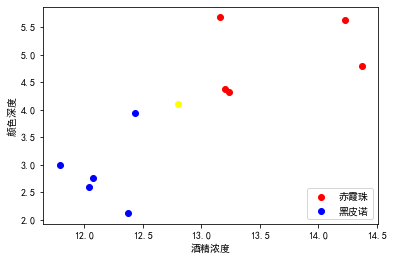

In [7]:
plt.figure(figsize=(6,4))
plt.scatter(win_data.loc[win_data['品种']==0].iloc[:,0],win_data.loc[win_data['品种']==0].iloc[:,1],color='r',label='赤霞珠')
plt.scatter(win_data.loc[win_data['品种']==1].iloc[:,0],win_data.loc[win_data['品种']==1].iloc[:,1],color='b',label='黑皮诺')
plt.scatter(new_data[0],new_data[1],color='yellow')
plt.xlabel('酒精浓度')
plt.ylabel('颜色深度')
plt.legend(loc='lower right')#设置显示图例
plt.savefig('葡萄酒样本.png')
plt.show()

## 算距离

In [8]:
from math import sqrt

distinct=[]
for i in range(0,len(x)):
    d=sqrt((x.iloc[i,0]-new_data[0])**2+(x.iloc[i,1]-new_data[1])**2)
    distinct.append(d)

## 找邻居

In [9]:
sort_dist=np.argsort(distinct)

print(sort_dist)

[y[i] for i in sort_dist]

y_label=[]
for i in sort_dist:
    y_label.append(y[i])
#[y[i] for i in sort_dist]
print(y_label)

[6 1 4 7 5 2 9 3 8 0]
[1, 0, 0, 1, 1, 0, 1, 0, 1, 0]


## 确定前k个邻居的标签

In [10]:
k=5
y_label[0:k]

[1, 0, 0, 1, 1]

## 统计前k个标签数量

In [11]:
from collections import Counter

votes=Counter(y_label[0:k])

print(votes)

Counter({1: 3, 0: 2})


## 返回预测值

In [12]:
predict=votes.most_common()[0][0]#most_common(n)列出n个最常见的元素及其计数

In [13]:
predict

1

## 代码汇总

In [14]:
def KNN(inx,dataset,k):
    import numpy as np
    import pandas as pd
    from math import sqrt
    from collections import Counter
    
    result=[]
    distance = [sqrt(np.sum((x-inx)**2)) for x in np.array(dataset.iloc[:,0:2])]
    sort_dist = np.argsort(distance)
    topK = [dataset.iloc[:,-1][i] for i in sort_dist[:k]]
    result.append(Counter(topK).most_common(1)[0][0])
    return result

In [15]:
KNN(new_data,win_data,3)

[0]

# sklearn实现

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
new_data

array([12.8,  4.1])

In [18]:
#实例化
clf=KNeighborsClassifier(n_neighbors=3)
#训练模型
clf.fit(x,y)
#预测输出
result=clf.predict([new_data])
result

array([0], dtype=int64)

## 模型的其他属性接口

In [19]:
# score接口返回预测准确率
clf.score([new_data],[0])#预测为0的准确率

1.0

In [20]:
# predict_proba返回预测的概率
clf.predict_proba([new_data])

array([[0.66666667, 0.33333333]])

In [21]:
new_data

array([12.8,  4.1])

In [22]:
# kneighbors返回该预测样本选择的实例样本的距离和索引

# cancer数据KNN实现

In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [24]:
data=load_breast_cancer()

#data

x=data.data

y=data.target

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

print(xtrain.shape)
print(xtest.shape)

(455, 30)
(114, 30)


In [25]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier().fit(xtrain,ytrain)
score=clf.score(xtest,ytest)
score

0.9649122807017544

In [26]:
#返回实例点的距离和索引
clf.kneighbors(X=xtest[[10,20],:],return_distance=True)

(array([[ 6.15977994, 17.99407432, 18.18679001, 18.87013272, 20.52808626],
        [22.99168013, 23.79850821, 24.98779424, 25.28392703, 26.03230564]]),
 array([[  5, 185,  82,  26, 227],
        [141,  55, 286, 219, 417]], dtype=int64))

## 学习曲线选择最优k值(调超参数)

- k值较小，预测结果对近邻的实例点非常敏感，如果近邻的实例点恰好是噪声，预测出错。
- k值较大，较远的训练实例也会对预测起作用，导致预测出错。

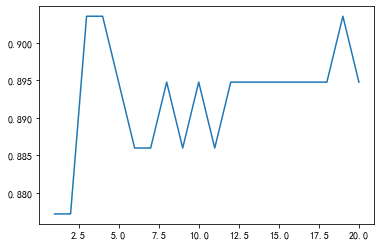

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
krange=range(1,21)
score=[]
for i in krange:
    clf=KNeighborsClassifier(n_neighbors=i).fit(xtrain,ytrain)
    score.append(clf.score(xtest,ytest))
plt.plot(krange,score)
plt.show()

In [28]:
# 返回score最大的k值
score.index(max(score))+1

3

In [29]:
clf=KNeighborsClassifier(n_neighbors=13).fit(xtrain,ytrain)
score=clf.score(xtest,ytest)
score

0.8947368421052632

## 交叉验证（验证模型稳定性，模型是否真正具有泛化能力）

泛化能力：模型在未知数据集上表现优秀的能力
- 训练误差：模型在训练集上分错样本的比率，用来判定给定问题是不是容易学习
- 测试误差：模型在测试集上分错样本的比率，反映模型对陌生数据的预测能力

In [30]:
from sklearn.model_selection import cross_val_score as cvs

In [31]:
clf=KNeighborsClassifier(n_neighbors=5)
cvsresult=cvs(clf,xtrain,ytrain,cv=5)
cvsresult

array([0.9673913 , 0.93406593, 0.95604396, 0.97802198, 0.93333333])

In [32]:
# 模型的平均效果
cvsresult.mean()

0.9537713011626054

In [33]:
# 模型的稳定性（方差）
cvsresult.var()

0.00031695535930355864

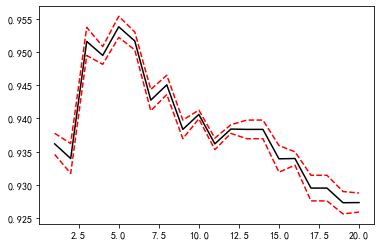

In [34]:
score=[]
var_ = []
krange = range(1,21)

for i in krange:
    clf = KNeighborsClassifier(n_neighbors=i).fit(xtrain,ytrain)
    cvresult = cvs(clf,xtrain,ytrain,cv=5)
    score.append(cvresult.mean())
    var_.append(cvresult.var())
    
plt.plot(krange,score,color='k')
plt.plot(krange,np.array(score)+np.array(var_)*5,c='red',linestyle='--')
plt.plot(krange,np.array(score)-np.array(var_)*5,c='red',linestyle='--')
plt.show()

In [35]:
score.index(max(score))+1

5

## 归一化

KNN是距离类模型，欧氏距离的计算公式对特征的取值非常敏感，为解决‘量纲不统一’问题，需要先对数据集进行归一化处理，将所有数据都压缩到一个范围内。

- 应该先划分训练集，测试集，再对数据归一化，这里理解为现有数据都是训练数据

In [36]:
from sklearn.preprocessing import MinMaxScaler as mms
X_ = mms().fit_transform(X)

score=[]
var_ = []
krange = range(1,21)

for i in krange:
    clf = KNeighborsClassifier(n_neighbors=i)
    cvresult = cvs(clf,X_,y,cv=5)
    score.append(cvresult.mean())
    var_.append(cvresult.var())
    
plt.plot(krange,score,color='k')
plt.plot(krange,np.array(score)+np.array(var_),c='red',linestyle='--')
plt.plot(krange,np.array(score)-np.array(var_),c='red',linestyle='--')
plt.show()

NameError: name 'X' is not defined

In [ ]:
score.index(max(score))+1

## 距离作为惩罚因子优化模型

- ‘一点一票’规则简单计数实际上是不公平的，就算是最近邻的k个点，距离也有远近之别，可以选择合适的惩罚因子，让相对远的点效力更弱；同时降低了KNN对K取值的敏感度。
- 理论上模型更优，能否发挥效用，取决于优化方法和实际数据的契合程度，如果数据本身存在大量的异常值点，则采用距离作为惩罚因子会有好的效果。

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3).fit(xtrain,ytrain)
score = clf.score(xtest,ytest)
score

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3,weights='distance').fit(xtrain,ytrain)
score = clf.score(xtest,ytest)
score